## 卷积模块介绍
前面我们介绍了卷积网络的基本知识，其在计算机视觉领域被应用得非常广泛，那么常见的卷机网络中用到的模块能够使用`tensorflow`非常轻松地实现，下面我们来讲一下`tensorflow`中的卷积模块

In [ ]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function

import tensorflow as tf

## 卷积
卷积在原生的`tensorflow`中的`API`是 **`tf.nn.conv2d()`**

<img src="https://image.ibb.co/dMHzfx/tf_nn_conv2d.png">

- 第一个参数`input`是输入, 要求一定一个形状为`(a, b, c, d)`的`tensor`,也就是通常说的4维张量. 它具有两种形式:`NHWC , NCHW`, 表示输入的通道在第二维或者是第四维, 在后面的参数`data_format`中可以进行选择


- 第二个参数`filter`就是参与卷积的`卷积核`, 要求是一个4维张量, 形状是`[height, width, in_depth, out_depth]`. 其中`height, width`表示卷积核本身的大小, `in_depth`必须和`input`的通道数保持一致, `out_depth`表示卷积核的个数


- 第三个参数`strides`是卷积核滑动的步长, 要求是一个4维张量, 第二维和第三维表示卷积核的大小, 对于`NHWC`的输入来说形状是`(1, stride_h, stride_w, 1)`, 对于`NCHW`的输入来说是`(1, 1, stride_h, stride_w)`


- 第四个参数`padding`是补洞策略, 可以选择`"SAME"`或者是`"VALID"`, 区别之后会解释


- 后面几个参数暂时不用管它, 大家可以自己探索


接下来我们就来尝试使用卷积

In [8]:
import urllib.request
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [5]:
im_url = 'https://image.ibb.co/iFGs0x/kitty.png'
im = Image.open(urllib.request.urlopen(im_url)).convert('L') # 读入一张灰度图的图片
im = np.array(im, dtype='float32') # 将其转换为一个矩阵

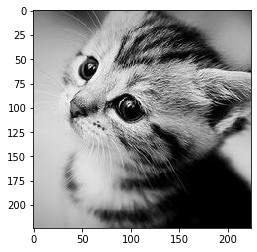

In [6]:
# 可视化图片
plt.imshow(im.astype('uint8'), cmap='gray')

In [9]:
# 将图片矩阵转化为 tensor，并适配卷积输入的要求
im = tf.constant(im.reshape((1, im.shape[0], im.shape[1], 1)), name='input')

In [10]:
# 定义一个边缘检测算子`sobel_kernel`, 并规范形状
sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)
sobel_kernel = tf.constant(sobel_kernel, shape=(3, 3, 1, 1))

In [13]:
# 进行卷积

## padding='SAME' 的卷积
edge1 = tf.nn.conv2d(im, sobel_kernel, [1, 1, 1, 1], 'SAME', name='same_conv')

## padding='VALID' 的卷积
edge2 = tf.nn.conv2d(im, sobel_kernel, [1, 1, 1, 1], 'VALID', name='valid_conv')

In [14]:
sess = tf.InteractiveSession()

In [15]:
edge1_np = sess.run(edge1)
edge2_np = sess.run(edge2)

Text(0.5, 1.0, 'shape = (1, 224, 224, 1)')

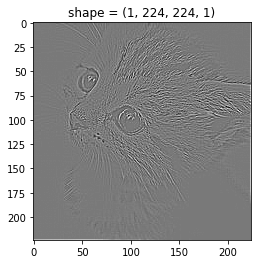

In [16]:
plt.imshow(np.squeeze(edge1_np), cmap='gray')
plt.title('shape = {}'.format(edge1_np.shape))

Text(0.5, 1.0, 'shape = (1, 222, 222, 1)')

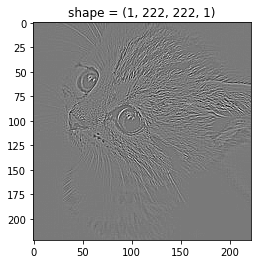

In [17]:
plt.imshow(np.squeeze(edge2_np), cmap='gray')
plt.title('shape = {}'.format(edge2_np.shape))

#### 思考
这两种卷积的输出结果在形状上有什么不同?为什么?

#### 思路
参考[卷积的基本知识](https://github.com/SherlockLiao/ai-class-intro/blob/master/tensorflow/course_2/Introduce_to_Convolution_Neural_Network.ipynb)

### 池化
在这里我们讨论最大值池化.

最大值池化在原生的`tensorflow`中的`API`是 **`tf.nn.max_pool()`**

<img src="https://image.ibb.co/hibgtH/tf_nn_max_pool.png">

和`tf.nn.conv2d`的参数类似, 它也有`value`(对应于卷积的`input`), `strides`, `padding`等参数, 唯一不同的就是`ksize`这个参数. 这是由于池化层的`kernel`只需要知道大小造成的, 在输入是`NHWC`时它的形状是`(1, ksize_h, ksize_w, 1)`

In [18]:
small_im1 = tf.nn.max_pool(im, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME', name='same_max_pool')
small_im2 = tf.nn.max_pool(im, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID', name='valid_max_pool')

In [19]:
small_im1_np, small_im2_np = sess.run([small_im1, small_im2])

Text(0.5, 1.0, 'shape = (1, 112, 112, 1)')

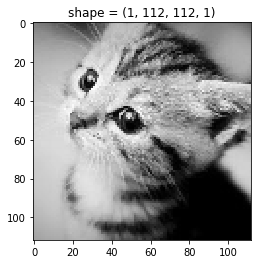

In [20]:
plt.imshow(np.squeeze(small_im1_np), cmap='gray')
plt.title('shape = {}'.format(small_im1_np.shape))

Text(0.5, 1.0, 'shape = (1, 112, 112, 1)')

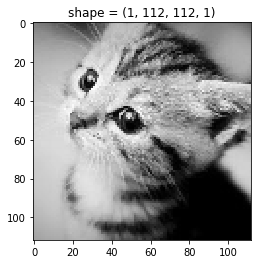

In [21]:
plt.imshow(np.squeeze(small_im2_np), cmap='gray')
plt.title('shape = {}'.format(small_im2_np.shape))

可以看到, 经过池化的下采样并没有丢失多少信息, 但是可以大大减少神经网络中参数的个数

### 结语
这次我们尝试使用了`tensorflow`的卷积和池化模块来观察它是如何工作的, jie xia la